In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [20]:
from sklearn import tree

df = pd.read_csv('iris_df.csv')
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()
#df = pd.concat([df, pd.get_dummies(df['Y'],prefix="Y")],axis=1)
#df.drop(['Y'],axis=1, inplace=True)
#df.head()

,X1,X2,X3,X4,Y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [21]:
from sklearn.model_selection import train_test_split

decision = tree.DecisionTreeClassifier()

In [31]:
X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3)

decision.fit(trainX, trainY)
print('Accuracy: \n', decision.score(testX, testY))

Accuracy: 
 0.9555555555555556


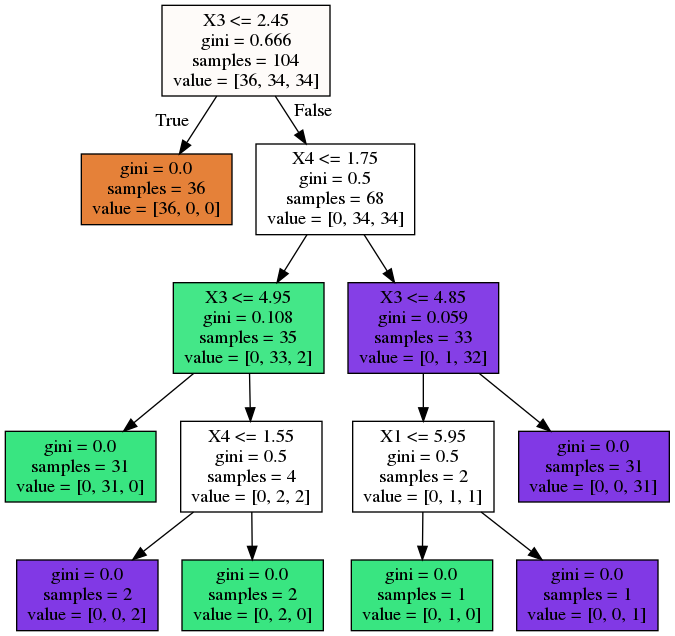

In [32]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot

dot_data = StringIO()
tree.export_graphviz(decision, feature_names=['X1', 'X2', 'X3', 'X4'], out_file=dot_data,filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())